In [ ]:
#Daily historical Brent Oil Prices available on the U.S. Energy Information Admin


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [13]:
brent = pd.read_csv('csv files/brent_oil.csv', parse_dates=['Date'])

In [41]:
brent.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
brent

,Date,Open,High,Low,Close,Volume
0,2000-01-04,23.90,24.70,23.89,24.39,32509
1,2000-01-05,24.25,24.37,23.70,23.73,30310
2,2000-01-06,23.55,24.22,23.35,23.62,44662
3,2000-01-07,23.57,23.98,23.05,23.09,34826
4,2000-01-10,23.04,23.78,23.04,23.73,26388
...,...,...,...,...,...,...
5713,2022-04-04,104.08,108.68,102.89,107.53,218681
5714,2022-04-05,108.51,109.90,104.53,106.64,203055
5715,2022-04-06,105.70,108.67,100.54,101.07,286516
5716,2022-04-07,101.78,103.59,98.41,100.58,296034


In [46]:
brent['Year']=brent.Date.dt.year

In [47]:
brent['Day']=brent.Date.dt.day

In [49]:
brent['Month']=brent.Date.dt.month

In [51]:
brent.drop('Date', axis =1, inplace = True)

In [52]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718 entries, 0 to 5717
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5718 non-null   float64
 1   High    5718 non-null   float64
 2   Low     5718 non-null   float64
 3   Close   5718 non-null   float64
 4   Volume  5718 non-null   int64  
 5   Year    5718 non-null   int64  
 6   Day     5718 non-null   int64  
 7   Month   5718 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 357.5 KB


# Lets Visualise

In [53]:
de = brent['Year']

In [54]:
de

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
5713    2022
5714    2022
5715    2022
5716    2022
5717    2022
Name: Year, Length: 5718, dtype: int64

In [55]:
de1 = brent['Volume']

<BarContainer object of 5718 artists>

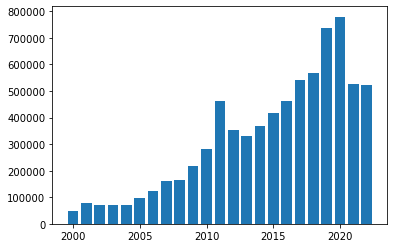

In [56]:
plt.bar(de,de1)

In [ ]:
# Our Target will be to Predict the High for the Oil Price

In [ ]:
#Split Data set

In [57]:
X = brent.drop('High', axis =1)
y = brent['High']

In [58]:
X

,Open,Low,Close,Volume,Year,Day,Month
0,23.90,23.89,24.39,32509,2000,4,1
1,24.25,23.70,23.73,30310,2000,5,1
2,23.55,23.35,23.62,44662,2000,6,1
3,23.57,23.05,23.09,34826,2000,7,1
4,23.04,23.04,23.73,26388,2000,10,1
...,...,...,...,...,...,...,...
5713,104.08,102.89,107.53,218681,2022,4,4
5714,108.51,104.53,106.64,203055,2022,5,4
5715,105.70,100.54,101.07,286516,2022,6,4
5716,101.78,98.41,100.58,296034,2022,7,4


In [59]:
y

0        24.70
1        24.37
2        24.22
3        23.98
4        23.78
         ...  
5713    108.68
5714    109.90
5715    108.67
5716    103.59
5717    103.30
Name: High, Length: 5718, dtype: float64

In [ ]:
#Split Data Set to Train and test

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size =0.2, random_state = 42)

In [62]:
X_train.shape

(4574, 7)

In [63]:
y_train.shape

(4574,)

In [64]:
X_test.shape

(1144, 7)

In [65]:
#Lets Bring in the model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [66]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
model.score(X_train, y_train)

0.9999452854620725

In [68]:
model.predict(X_test)

array([ 79.7364, 114.4816,  47.2547, ...,  57.8365, 110.8857,  63.3511])

In [71]:
y_true

1966     79.54
2857    114.18
4326     46.99
3558    111.55
3213    106.99
         ...  
5270     43.45
527      20.03
3903     57.69
3616    110.82
1765     63.27
Name: High, Length: 1144, dtype: float64

In [74]:
y_pred = model.predict(X_test)

In [70]:
y_true = y_test

In [ ]:
model.evaluate()

In [75]:
#Evaluate Model

from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

0.27972110256993116

In [153]:
r2_score(y_true, y_pred)

0.9996865836068664

In [109]:
from sklearn.metrics import r2_score
r2_s= r2_score(y_true, y_pred)

In [152]:
print(f'The Model is {r2_s:.2%}')

The Model is 99.97%


In [ ]:
#Test on a New Data

In [159]:
X_test.shape

(1144, 7)

In [155]:
new_data = np.array([78.93, 76.22, 77.67, 100098, 2022, 14, 4])

In [160]:
new_data.shape

(7,)

In [175]:
new_d = pd.DataFrame(new_data)
new_d

,0
0,78.93
1,76.22
2,77.67
3,100098.00
4,2022.00
5,14.00
6,4.00


In [173]:
new_d.ndim

2

In [179]:
model.predict(new_d.T)

array([79.1783])